<a href="https://colab.research.google.com/github/lover-swan/project2_2/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
하드웨어의 한계로 데이터 수를 줄이기 위해
결측치를 단순 삭제 하였다.
때문에 본래 80%였던 장바구니-구매 전환율이 67%로 대폭 감소하였다.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/project2_2/2019-Oct.csv')

In [3]:
data

,event_time,event_type,product_id,category_code,brand,price,user_id
0,2019-10-01 00:00:00 UTC,view,44600062,NaN,shiseido,35.79,541312140
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717
2,2019-10-01 00:00:01 UTC,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250
3,2019-10-01 00:00:01 UTC,view,1307067,computers.notebook,lenovo,251.74,550050854
4,2019-10-01 00:00:04 UTC,view,1004237,electronics.smartphone,apple,1081.98,535871217
...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,electronics.camera.video,gopro,527.40,537931532
42448760,2019-10-31 23:59:58 UTC,view,10800172,NaN,redmond,61.75,527322328
42448761,2019-10-31 23:59:58 UTC,view,5701038,auto.accessories.player,kenwood,128.70,566280422
42448762,2019-10-31 23:59:59 UTC,view,21407424,electronics.clocks,tissot,689.85,513118352


In [4]:
data.isna().sum()

event_time              0
event_type              0
product_id              0
category_code    13515609
brand             6117080
price                   0
user_id                 0
dtype: int64

In [6]:
data=data.dropna().reset_index(drop=True)

In [8]:
count_type=data.event_type.value_counts()

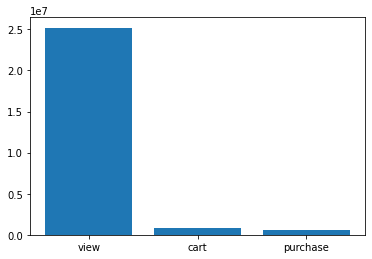

In [9]:
plt.bar(count_type.index,count_type)
plt.show()

In [10]:
#클릭-장바구니 전환율 

In [11]:
count_type.cart/count_type['view'] #3.2%

0.032117230476381244

In [8]:
#장바구니-구매 전환율 

In [13]:
count_type.purchase/count_type.cart #67%

0.6788990485650641

In [10]:
#클릭-구매 전환율 

In [14]:
count_type.purchase/count_type['view'] #2.1%

0.021804357212960108

In [12]:
# 장바구니에서 구매로의 전환율은 67%로 양호 
# 따라서 클릭-장바구니의 전환율을 높이는 것이 합리적 

In [15]:
data=data[data.event_type!='purchase'].reset_index(drop=True)

In [18]:
data.to_csv('/content/drive/MyDrive/project2_2/data.csv',index=False)